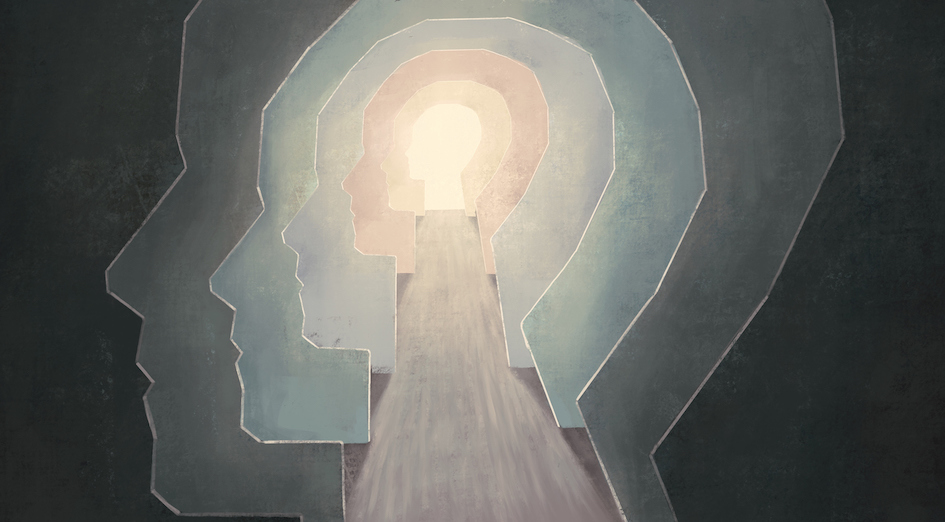

In [27]:

# @title   {"display-mode":"both"}


from IPython.display import Image
Image('mentalhealth.png')



In [5]:
# @title

import pandas as pd
import sqlite3

In [6]:
# @title
from google.colab import files
uploaded = files.upload()

Saving students.csv to students.csv


In [7]:
import pandas as pd
df = pd.read_csv('students.csv')
df.head()  # Verify the data loaded correctly

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,...,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No


In [8]:
import sqlite3
conn = sqlite3.connect(':memory:')  # In-memory DB for speed
df.to_sql('students', conn, if_exists='replace', index=False)

286

In [9]:
query = "SELECT * FROM students LIMIT 5;"
result = pd.read_sql_query(query, conn)
result

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,...,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No


In [10]:
query = "SELECT * FROM students;"
pd.read_sql_query(query, conn)

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,...,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,None,None,None,None,NaN,NaN,NaN,None,NaN,None,...,222,None,None,None,None,None,None,None,None,None
282,None,None,None,None,NaN,NaN,NaN,None,NaN,None,...,249,None,None,None,None,None,None,None,None,None
283,None,None,None,None,NaN,NaN,NaN,None,NaN,None,...,203,None,None,None,None,None,None,None,None,None
284,None,None,None,None,NaN,NaN,NaN,None,NaN,None,...,247,None,None,None,None,None,None,None,None,None


In [11]:
query = """
SELECT stay,
       COUNT(*) AS count_int,
       ROUND(AVG(todep), 2) AS average_phq,
       ROUND(AVG(tosc), 2) AS average_scs,
       ROUND(AVG(toas), 2) AS average_as
FROM students
WHERE inter_dom = 'Inter'
GROUP BY stay
ORDER BY stay DESC;
"""
pd.read_sql_query(query, conn)

,stay,count_int,average_phq,average_scs,average_as
0,10.0,1,13.00,32.00,50.00
1,8.0,1,10.00,44.00,65.00
2,7.0,1,4.00,48.00,45.00
3,6.0,3,6.00,38.00,58.67
4,5.0,1,0.00,34.00,91.00
5,4.0,14,8.57,33.93,87.71
6,3.0,46,9.09,37.13,78.00
7,2.0,39,8.28,37.08,77.67
8,1.0,95,7.48,38.11,72.80


In [12]:
query = """
SELECT stay,
       inter_dom,
       COUNT(*) AS count_students,
       ROUND(AVG(todep), 2) AS avg_depression,
       ROUND(AVG(tosc), 2) AS avg_connectedness,
       ROUND(AVG(toas), 2) AS avg_stress
FROM students
GROUP BY stay, inter_dom
ORDER BY stay DESC, inter_dom;
"""
pd.read_sql_query(query, conn)

,stay,inter_dom,count_students,avg_depression,avg_connectedness,avg_stress
0,10.0,Inter,1,13.00,32.00,50.00
1,8.0,Inter,1,10.00,44.00,65.00
2,7.0,Inter,1,4.00,48.00,45.00
3,6.0,Inter,3,6.00,38.00,58.67
4,5.0,Dom,2,11.50,34.00,88.00
5,5.0,Inter,1,0.00,34.00,91.00
6,4.0,Dom,9,7.00,36.67,64.78
7,4.0,Inter,14,8.57,33.93,87.71
8,3.0,Dom,23,8.43,39.09,58.04
9,3.0,Inter,46,9.09,37.13,78.00


In [13]:
query = """
SELECT japanese_cate,
       COUNT(*) AS count_students,
       ROUND(AVG(todep), 2) AS avg_depression,
       ROUND(AVG(tosc), 2) AS avg_connectedness,
       ROUND(AVG(toas), 2) AS avg_stress
FROM students
WHERE inter_dom = 'Inter'
GROUP BY japanese_cate
ORDER BY avg_depression DESC;
"""
pd.read_sql_query(query, conn)

,japanese_cate,count_students,avg_depression,avg_connectedness,avg_stress
0,Average,85,8.38,37.56,75.45
1,Low,91,7.91,36.99,76.65
2,High,25,7.40,38.48,72.00


In [14]:
query = """
SELECT academic,
       COUNT(*) AS count_students,
       ROUND(AVG(todep), 2) AS avg_depression,
       ROUND(AVG(tosc), 2) AS avg_connectedness,
       ROUND(AVG(toas), 2) AS avg_stress
FROM students
WHERE inter_dom = 'Inter'
GROUP BY academic;
"""
pd.read_sql_query(query, conn)

,academic,count_students,avg_depression,avg_connectedness,avg_stress
0,Grad,20,4.95,40.90,75.80
1,Under,181,8.39,37.03,75.54


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-2038622348.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stay_lengths, y=avg_depression, palette='Blues')


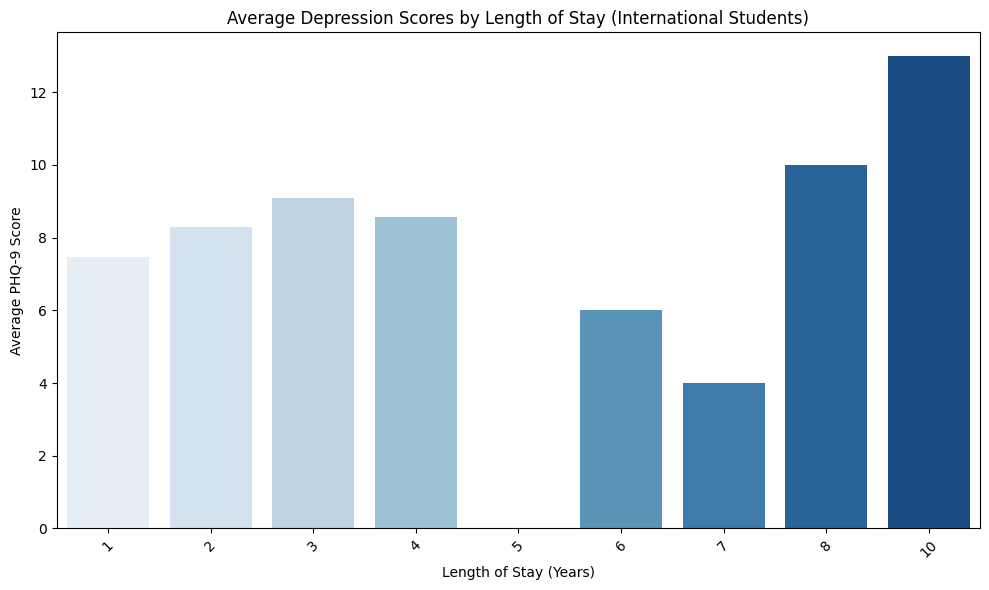

In [16]:
# Data from Page 2
stay_lengths = [10, 8, 7, 6, 5, 4, 3, 2, 1]
avg_depression = [13, 10, 4, 6, 0, 8.57, 9.09, 8.28, 7.48]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=stay_lengths, y=avg_depression, palette='Blues')
plt.title('Average Depression Scores by Length of Stay (International Students)')
plt.xlabel('Length of Stay (Years)')
plt.ylabel('Average PHQ-9 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

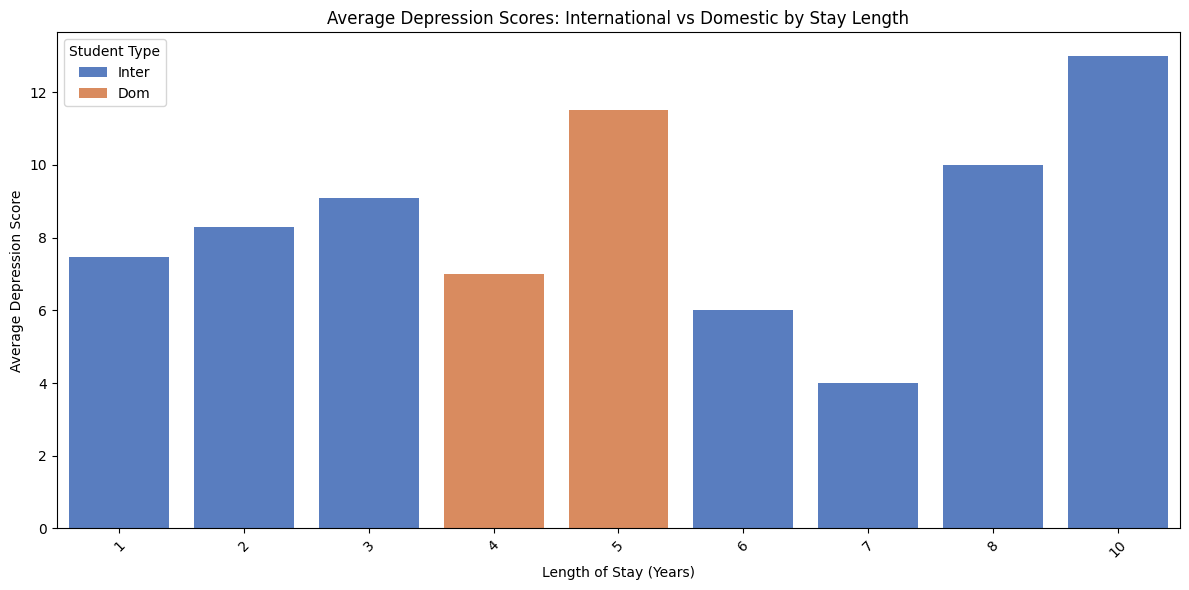

In [17]:
# Data from Page 3
stay_lengths = [10, 8, 7, 6, 5, 4, 3, 2, 1]
inter_dom = ['Inter', 'Inter', 'Inter', 'Inter', 'Dom', 'Dom', 'Inter', 'Inter', 'Inter']
avg_depression = [13, 10, 4, 6, 11.5, 7, 9.09, 8.28, 7.48]

# Create DataFrame
data = pd.DataFrame({'stay': stay_lengths, 'inter_dom': inter_dom, 'avg_depression': avg_depression})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='stay', y='avg_depression', hue='inter_dom', data=data, palette='muted')
plt.title('Average Depression Scores: International vs Domestic by Stay Length')
plt.xlabel('Length of Stay (Years)')
plt.ylabel('Average Depression Score')
plt.legend(title='Student Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1232311657.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=academic, y=avg_depression, palette='Reds')


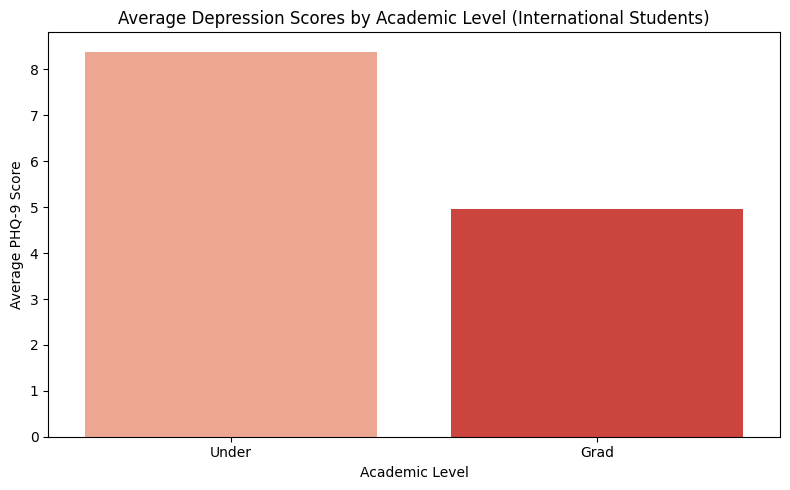

In [18]:
# Data from Page 4
academic = ['Under', 'Grad']
avg_depression = [8.39, 4.95]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=academic, y=avg_depression, palette='Reds')
plt.title('Average Depression Scores by Academic Level (International Students)')
plt.xlabel('Academic Level')
plt.ylabel('Average PHQ-9 Score')
plt.tight_layout()
plt.show()